In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import itertools
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.nn.functional import relu
from torch.nn import Conv2d, MaxPool2d, Linear, CrossEntropyLoss
from torch.optim import Adam

Number of examples in train: 60000



6000 elements in class 0
6000 elements in class 1
6000 elements in class 2
6000 elements in class 3
6000 elements in class 4
6000 elements in class 5
6000 elements in class 6
6000 elements in class 7
6000 elements in class 8
6000 elements in class 9


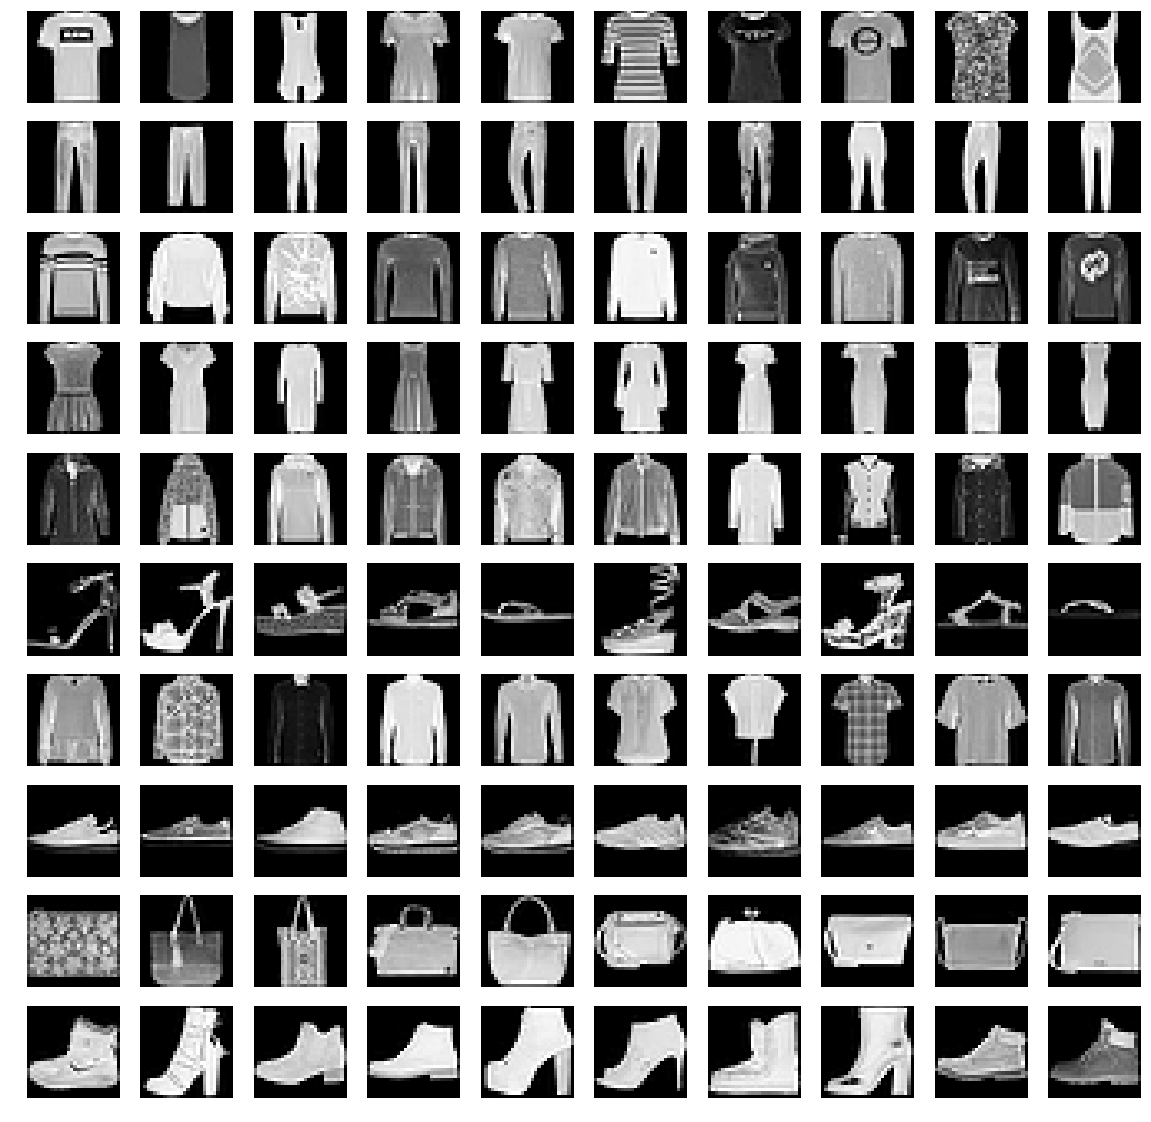

Number of examples in test: 10000



1000 elements in class 0
1000 elements in class 1
1000 elements in class 2
1000 elements in class 3
1000 elements in class 4
1000 elements in class 5
1000 elements in class 6
1000 elements in class 7
1000 elements in class 8
1000 elements in class 9


<Figure size 1440x1440 with 0 Axes>

In [22]:
datafolder = '~/FashionMNIST'
train_data = FashionMNIST(datafolder, train=True, download=True)
test_data = FashionMNIST(datafolder, train=False, download=True)

def get_info(dataset, title, number_of_samples=10, number_of_keys=10):
    print("Number of examples in {}: {}".format(title, len(dataset)))
    print()
    
    def get_class(element):
        return element[1]
    
    fig, axes = plt.subplots(nrows=number_of_keys, ncols=number_of_samples, figsize=(20, 20))
    dataset = sorted(dataset, key=get_class)
    for key, group in itertools.groupby(dataset, get_class):
        group = list(group)
        print("{} elements in class {}".format(len(group), key))
        for ind, (image, k) in enumerate(group[:number_of_samples]):
            axes[key, ind].imshow(image)
            axes[key, ind].set_axis_off()
    plt.show()

get_info(train_data, 'train')
get_info(test_data, 'test', number_of_samples=0)

In [10]:
class BasicCNN(torch.nn.Module):
    
    def __init__(self, input_dim=28, output_dim=10):
        """
        Basic CNN architecture. 2 convolution layers with max pooling, 2 fully connected layers to get the answer.
        input_dim should be multiple of 4
        """
        if input_dim % 4 != 0:
            raise ValueError('input_dim should be multiple of 4')
        
        super(BasicCNN, self).__init__()
        kernel = 5
        out_dim = 3
        hidden_layer = 32
        self.conv1 = Conv2d(in_channels=1, out_channels=out_dim, kernel_size=kernel, padding=(kernel - 1) // 2)
        self.maxpool1 = MaxPool2d(2)
        self.conv2 = Conv2d(in_channels=out_dim, out_channels=out_dim ** 2, kernel_size=kernel, padding=(kernel - 1) // 2)
        self.maxpool2 = MaxPool2d(2)
        self.linear1 = Linear((input_dim // 4) * (input_dim // 4) * (out_dim ** 2), hidden_layer)
        self.linear2 = Linear(hidden_layer, output_dim)
    
    def forward(self, x):
        x = relu(self.conv1(x))
        x = self.maxpool1(x)
        x = relu(self.conv2(x))
        x = self.maxpool2(x)
        x = x.view(-1, x[0].numel())
        x = relu(self.linear1(x))
        x = self.linear2(x)
        return x
        

In [7]:
datafolder = '~/FashionMNIST'
train_data = FashionMNIST(datafolder, train=True, download=True, transform=ToTensor())
test_data = FashionMNIST(datafolder, train=False, download=True, transform=ToTensor())

batch_size = 100
train_data = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = DataLoader(test_data, batch_size=batch_size, shuffle=True)


Epoch #1


After epoch #1:
Train loss = 0.408
Test loss = 0.427
Epoch #2


After epoch #2:
Train loss = 0.340
Test loss = 0.363
Epoch #3


After epoch #3:
Train loss = 0.315
Test loss = 0.340
Epoch #4


After epoch #4:
Train loss = 0.301
Test loss = 0.338
Epoch #5


After epoch #5:
Train loss = 0.286
Test loss = 0.332
Epoch #6


After epoch #6:
Train loss = 0.263
Test loss = 0.317
Epoch #7


After epoch #7:
Train loss = 0.262
Test loss = 0.315
Epoch #8


After epoch #8:
Train loss = 0.245
Test loss = 0.303
Epoch #9


After epoch #9:
Train loss = 0.260
Test loss = 0.315
Epoch #10


After epoch #10:
Train loss = 0.227
Test loss = 0.293


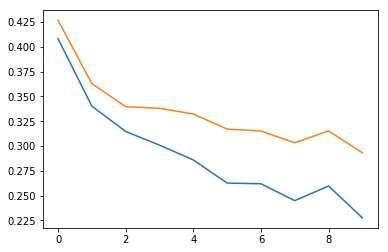

In [11]:
def total_loss(model, data, criterion):
    with torch.no_grad():
        total = 0
        for in_batch, out_batch in data:
            total += criterion(model(in_batch), out_batch).item()
    return total / len(data)

epochs = 10
learning_rate = 0.005

model = BasicCNN()
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)
train_loss = []
test_loss = []

for epoch in range(1, epochs + 1):
    print("Epoch #{}".format(epoch))
    for in_batch, out_batch in train_data:
        out_pred = model(in_batch)
        loss = criterion(out_pred, out_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
    train_loss.append(total_loss(model, train_data, criterion))
    test_loss.append(total_loss(model, test_data, criterion))
    print("After epoch #{}:\nTrain loss = {:.3f}\nTest loss = {:.3f}".format(epoch, train_loss[-1], test_loss[-1]))
    
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.show()